In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [210]:
df1 = pd.read_csv('data/temp0.900000_1.csv')

In [211]:
df = pd.read_csv('tempmc.csv')
dfw = pd.read_csv('tempwolff.csv')
dfo = pd.read_csv('tempmc.csv.old')
dfwo = pd.read_csv('tempwolff.csv.old')

In [212]:
df

t  mag0.3_0       t.1  mag0.3_1       t.2  mag0.3_2       t.3  \
0     7010000         1   7010000         1   7010000         1   7010000   
1     7020000         1   7020000         1   7020000         1   7020000   
2     7030000         1   7030000         1   7030000         1   7030000   
3     7040000         1   7040000         1   7040000         1   7040000   
4     7050000         1   7050000         1   7050000         1   7050000   
..        ...       ...       ...       ...       ...       ...       ...   
295   9960000         1   9960000         1   9960000         1   9960000   
296   9970000         1   9970000         1   9970000         1   9970000   
297   9980000         1   9980000         1   9980000         1   9980000   
298   9990000         1   9990000         1   9990000         1   9990000   
299  10000000         1  10000000         1  10000000         1  10000000   

     mag0.3_3       t.4  mag0.3_4  ...      t.75  mag3.9_0      t.76  \
0           1   7010000         1  ...   7010000    0.0338   7010000   
1           1   7020000         1  ...   7020000    0.0124   7020000   
2           1   7030000         1  ...   7030000    0.0166   7030000   
3           1   7040000         1  ...   7040000    0.0174   7040000   
4           1   7050000         1  ...   7050000    0.0332   7050000   
..        ...       ...       ...  ...       ...       ...       ...   
295         1   9960000         1  ...   9960000    0.0174   9960000   
296         1   9970000         1  ...   9970000    0.0392   9970000   
297         1   9980000         1  ...   9980000    0.0316   9980000   
298         1   9990000         1  ...   9990000    0.0132   9990000   
299         1  10000000         1  ...  10000000    0.0044  10000000   

     mag3.9_1      t.77  mag3.9_2      t.78  mag3.9_3      t.79  mag3.9_4  
0     -0.0038   7010000   -0.0490   7010000    0.0276   7010000   -0.0058  
1     -0.0192   7020000   -0.0526   7020000    0.0404   7020000   -0.0038  
2     -0.0046   7030000   -0.0308   7030000    0.0214   7030000   -0.0060  
3     -0.0100   7040000   -0.0106   7040000    0.0044   7040000   -0.0220  
4     -0.0062   7050000    0.0046   7050000    0.0074   7050000   -0.0160  
..        ...       ...       ...       ...       ...       ...       ...  
295   -0.0184   9960000    0.0326   9960000   -0.0564   9960000    0.0234  
296   -0.0204   9970000    0.0172   9970000   -0.0406   9970000    0.0230  
297    0.0058   9980000   -0.0058   9980000   -0.0246   9980000    0.0250  
298    0.0200   9990000    0.0106   9990000   -0.0118   9990000    0.0018  
299    0.0300  10000000    0.0044  10000000    0.0000  10000000    0.0224  

[300 rows x 160 columns]

In [213]:
df.columns

Index(['t', 'mag0.3_0', 't.1', 'mag0.3_1', 't.2', 'mag0.3_2', 't.3',
       'mag0.3_3', 't.4', 'mag0.3_4',
       ...
       't.75', 'mag3.9_0', 't.76', 'mag3.9_1', 't.77', 'mag3.9_2', 't.78',
       'mag3.9_3', 't.79', 'mag3.9_4'],
      dtype='object', length=160)

In [214]:
tempdict = {2.0: 2, 3.0: 3}

In [215]:
temps = [tempdict.get(n, n) for n in Temps]

No handles with labels found to put in legend.


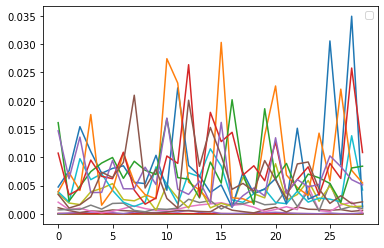

In [216]:
susc_vals1 = []
susc_errs1 = []
for temp in temps:
    #temp = 1.2
    suscs = []
    magarray = df['mag'+str(temp)+'_0'].to_numpy()
    for i in range(0, len(magarray), 10):
        bin_average = 0
        counter = 0
        O_expect_sus = 0
        O_sus = 0
        for j in range(i, i+10):
            if j == 299:
                break
            bin_average += magarray[j]
            counter += 1
            O_expect_sus += magarray[j]
            O_sus += (magarray[j])**2
        O_expect_sus /= float(10)
        O_expect_sus = O_expect_sus**2
        O_sus /= float(10)
        susceptibility = (1/temp*100*(O_sus - O_expect_sus))
        #print(susceptibility)
        suscs.append(susceptibility)
    susc_vals1.append(np.array(suscs[:-1]).mean())
    susc_errs1.append(np.array(suscs[:-1]).std())
    plt.plot(suscs[:-1])
plt.legend()

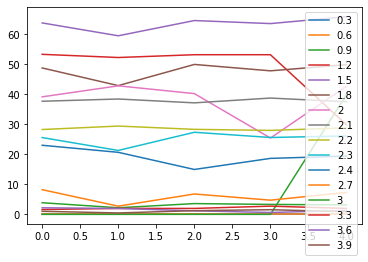

In [217]:
susc_vals = []
susc_errs = []
for temp in temps:
    #temp = 1.2
    suscs = []
    magarray = dfwo['mag'+str(temp)+'_0'].to_numpy()
    for i in range(0, len(magarray), 10):
        bin_average = 0
        counter = 0
        O_expect_sus = 0
        O_sus = 0
        for j in range(i, i+10):
            if j == 1000:
                break
            bin_average += magarray[j]
            counter += 1
            O_expect_sus += magarray[j]
            O_sus += (magarray[j])**2
        O_expect_sus /= float(10)
        O_expect_sus = O_expect_sus**2
        O_sus /= float(10)
        susceptibility = (1/temp*100*(O_sus - O_expect_sus))
        #print(susceptibility)
        suscs.append(susceptibility)
    susc_vals.append(np.array(suscs[:-1]).mean())
    susc_errs.append(np.array(suscs[:-1]).std())
    plt.plot(suscs[:-1], label=str(temp))
plt.legend()

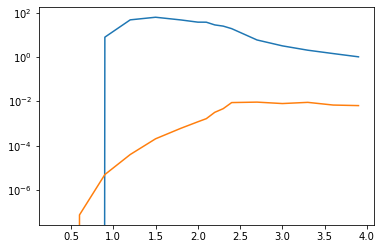

In [218]:
plt.plot(temps, susc_vals)
plt.plot(temps, susc_vals1)
plt.yscale('log')

In [219]:
Temps

[0.3,
 0.6,
 0.9,
 1.2,
 1.5,
 1.8,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.7,
 3.0,
 3.3,
 3.6,
 3.9]

In [220]:
tobedel_cols = [2*i for i in range(len(dfo.columns)//2)]
dfo = dfo.drop(dfo.columns[tobedel_cols], axis=1)

In [221]:
magvalo = []
magerro = []
for i in range(len(df.columns)//10):
    #print(i*10, (i+1)*10)
    val = abs(dfo.iloc[:, (i*10):(i+1)*10]).median().mean()
    err = abs(dfo.iloc[:, (i*10):(i+1)*10]).median().std()
    magvalo.append(val)
    magerro.append(err)
print(magvalo, magerro)

[1.0, 1.0, 1.0, 1.0, 0.999, 0.9620000000000001, 0.9309999999999998, 0.9040000000000001, 0.868, 0.7899999999999999, 0.708, 0.40499999999999997, 0.26399999999999996, 0.189, 0.178, 0.14400000000000002] [0.0, 0.0, 0.0, 0.0, 0.003162277660168382, 0.004216370213557843, 0.013703203194062942, 0.008432740427115688, 0.02347575581554537, 0.05754225500544021, 0.08175845182269809, 0.06916164640415477, 0.0429987079909256, 0.03071373199943851, 0.017511900715418267, 0.015776212754932305]


In [222]:
tobedel_cols = [2*i for i in range(len(dfwo.columns)//2)]
dfwo = dfwo.drop(dfwo.columns[tobedel_cols], axis=1)

In [223]:
magvalwo = []
magerrwo = []
for i in range(len(df.columns)//10):
    #print(i*10, (i+1)*10)
    val = abs(dfwo.iloc[:, (i*10):(i+1)*10]).median().mean()
    err = abs(dfwo.iloc[:, (i*10):(i+1)*10]).median().std()
    magvalwo.append(val)
    magerrwo.append(err)
print(magvalwo, magerrwo)

[1.0, 1.0, 1.0, 1.0, 0.9959999999999999, 0.9620000000000001, 0.9389999999999998, 0.906, 0.8600000000000001, 0.806, 0.6990000000000001, 0.378, 0.261, 0.176, 0.172, 0.144] [0.0, 0.0, 0.0, 0.0, 0.006992058987801017, 0.006324555320336765, 0.007378647873726192, 0.01074967699773141, 0.020548046676563275, 0.028362729848243513, 0.03900142447541, 0.038528488738133054, 0.038427420765212265, 0.03306559138036599, 0.018135294011647256, 0.015776212754932312]


In [224]:
tobedel_cols = [2*i for i in range(len(df.columns)//2)]
df = df.drop(df.columns[tobedel_cols], axis=1)

In [225]:
magval = []
magerr = []
for i in range(len(df.columns)//5):
    #print(i*10, (i+1)*10)
    val = abs(df.iloc[:, (i*5):(i+1)*5]).median().mean()
    err = abs(df.iloc[:, (i*5):(i+1)*5]).median().std()
    magval.append(val)
    magerr.append(err)
print(magval, magerr)

[1.0, 1.0, 0.9998000000000001, 0.9970000000000001, 0.98648, 0.9573400000000001, 0.91128, 0.86876, 0.7931999999999999, 0.5055799999999999, 0.11166000000000001, 0.043379999999999995, 0.024280000000000003, 0.017419999999999998, 0.01524, 0.014360000000000001] [0.0, 0.0, 1.2412670766236366e-16, 1.2412670766236366e-16, 0.00022803508501983654, 0.0007536577472566615, 0.0023573289969794184, 0.00345296973632845, 0.02447151405205652, 0.09844504558381797, 0.03454269821539712, 0.014251035050128813, 0.003412770135828078, 0.0012029131306956458, 0.0021090282122342508, 0.0014536161804272823]


In [226]:
Temps = [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.7, 3.0, 3.3, 3.6, 3.9]

In [227]:
tobedel_cols = [2*i for i in range(len(dfw.columns)//2)]
dfw = dfw.drop(dfw.columns[tobedel_cols], axis=1)

In [228]:
magval2 = []
magerr2 = []
for i in range(len(dfw.columns)//5):
    #print(i*10, (i+1)*10)
    val = abs(dfw.iloc[:, (i*5):(i+1)*5]).median().mean()
    err = abs(dfw.iloc[:, (i*5):(i+1)*5]).median().std()
    magval2.append(val)
    magerr2.append(err)
print(magval2, magerr2)

[1.0, 1.0, 0.9998000000000001, 0.9970399999999999, 0.9866400000000001, 0.9569599999999999, 0.9120799999999999, 0.8702400000000001, 0.79068, 0.33712, 0.08136, 0.03012, 0.026000000000000002, 0.01552, 0.015519999999999997, 0.023399999999999997] [0.0, 0.0, 1.2412670766236366e-16, 8.944271909998174e-05, 8.944271909998174e-05, 0.00016733200530684976, 0.00041472882706654085, 0.0008294576541330737, 0.001091787525116489, 0.012683532630935277, 0.008737734260092831, 0.006063992084427553, 0.006946941773183363, 0.005752564645442935, 0.007403512679802743, 0.008772684879784524]


In [229]:
Tc = 2/(np.log(1+np.sqrt(2)))

In [230]:
1/8

0.125

In [231]:
kb = 1.38064852e-23

In [232]:
onsx = np.arange(0.1, 4, 0.001)
onsy = [((1-1/(np.sinh(2*1/x))**4)**0.125) if (x<Tc) else 0 for x in onsx]

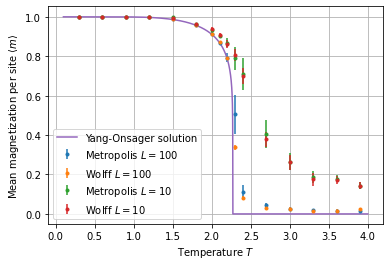

In [233]:
fig2 = plt.figure()
plt.errorbar(Temps, magval, yerr=magerr, marker='.', fmt=' ', label='Metropolis $L=100$')
plt.errorbar(Temps, magval2, yerr=magerr2, marker='.', fmt=' ', label='Wolff $L=100$')
plt.errorbar(Temps, magvalo, yerr=magerro, marker='.', fmt=' ', label='Metropolis $L=10$')
plt.errorbar(Temps, magvalwo, yerr=magerrwo, marker='.', fmt=' ', label='Wolff $L=10$')
plt.plot(onsx, onsy, label='Yang-Onsager solution')
plt.ylabel(r'Mean magnetization per site $\langle m \rangle$')
plt.xlabel(r'Temperature $T$')
plt.legend()
plt.grid()

In [234]:
fig2.savefig('fig2.pdf')

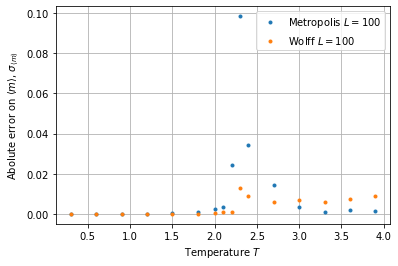

In [235]:
fig3 = plt.figure()
plt.errorbar(Temps, magerr, label='Metropolis $L=100$', marker='.', fmt=' ')
plt.errorbar(Temps, magerr2, label='Wolff $L=100$', marker='.', fmt=' ')
plt.ylabel(r'Abolute error on $\langle m \rangle$, $\sigma_{\langle m \rangle}$')
plt.xlabel(r'Temperature $T$')
plt.legend()
plt.grid()

In [236]:
fig3.savefig('fig3.pdf')

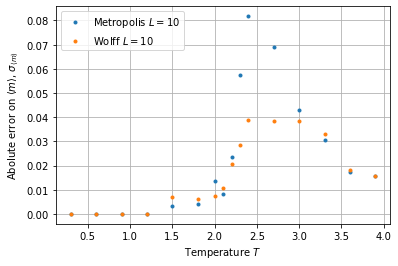

In [237]:
fig4 = plt.figure()
plt.errorbar(Temps, magerro, label='Metropolis $L=10$', marker='.', fmt=' ')
plt.errorbar(Temps, magerrwo, label='Wolff $L=10$', marker='.', fmt=' ')
plt.ylabel(r'Abolute error on $\langle m \rangle$, $\sigma_{\langle m \rangle}$')
plt.xlabel(r'Temperature $T$')
plt.legend()
plt.grid()

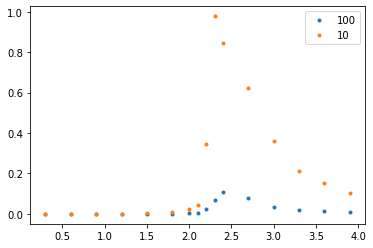

In [238]:
plt.plot(np.array(Temps), 1/np.array(Temps)*100*((df**2).mean() - df.mean()**2).to_numpy().reshape(16, 5).mean(axis=1), '.', label='100')
plt.plot(np.array(Temps), 1/np.array(Temps)*10*((dfo**2).mean() - dfo.mean()**2).to_numpy().reshape(16, 10).mean(axis=1), '.', label='10')
plt.legend()

In [239]:
fig4.savefig('fig4.pdf')

In [2]:
def exponential(x, a, b):
    return a*np.exp(-x/b)
def linear(x, a, b):
    return a+b*x

In [3]:
df = pd.read_csv('sizemc.csv')

In [10]:
df

t  mag10_0  t.1       mag20_0       t.2  mag50_0  t.3   mag80_0
0      0.0     0.02  0.0 -4.150000e-01  0.000000  -0.0832  0.0  0.144687
1      1.0     0.02  1.0 -4.150000e-01  1.000000  -0.0832  1.0  0.144687
2      2.0     0.02  2.0 -4.150000e-01  2.000000  -0.0832  2.0  0.144687
3      3.0     0.02  3.0 -4.150000e-01  3.000000  -0.0832  3.0  0.144687
4      4.0     0.02  4.0 -4.150000e-01  4.000000  -0.0832  4.0  0.144687
...    ...      ...  ...           ...       ...      ...  ...       ...
63995  NaN      NaN  NaN  2.880640e+07 -0.046875      NaN  NaN       NaN
63996  NaN      NaN  NaN  2.880640e+07 -0.047188      NaN  NaN       NaN
63997  NaN      NaN  NaN  2.880640e+07 -0.047188      NaN  NaN       NaN
63998  NaN      NaN  NaN  2.880640e+07 -0.047188      NaN  NaN       NaN
63999  NaN      NaN  NaN  2.880640e+07 -0.047188      NaN  NaN       NaN

[64000 rows x 8 columns]

In [20]:
df4 = pd.read_csv('data/size10_0.csv')

In [21]:
corrt = []

In [22]:
df4

t  mag10_0
0      0     0.02
1    100     0.02
2    200     0.02
3    300     0.02
4    400     0.02
..   ...      ...
95  9500     0.76
96  9600     0.58
97  9700     2.46
98  9800     0.72
99  9900     0.68

[100 rows x 2 columns]

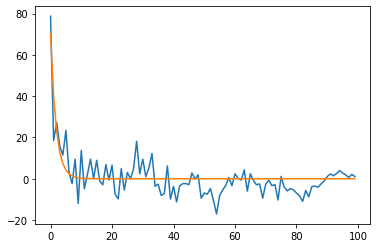

In [23]:
%matplotlib inline
#df4.plot()
a = df4['mag10_0'] - df4['mag10_0'].mean()
corr = np.correlate(a, a, mode='full')
corr = corr[corr.size//2:]
plt.plot(corr)
popt, pcov = curve_fit(exponential, np.arange(corr.size), (corr), p0=[80, 1])
plt.plot(exponential(np.arange(corr.size), *popt))
corrt.append(popt[1])

In [24]:
df5 = pd.read_csv('data/size20_0.csv')

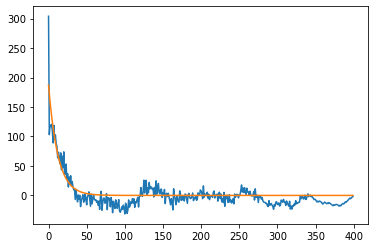

In [25]:
%matplotlib inline
#df4.plot()
a = df5['mag20_0'] - df5['mag20_0'].mean()
corr = np.correlate(a, a, mode='full')
corr = corr[corr.size//2:]
plt.plot(corr)
popt, pcov = curve_fit(exponential, np.arange(corr.size), (corr), p0=[1e12, 1])
plt.plot(exponential(np.arange(corr.size), *popt))
corrt.append(popt[1])

In [26]:
df5 = pd.read_csv('data/size50_0.csv')

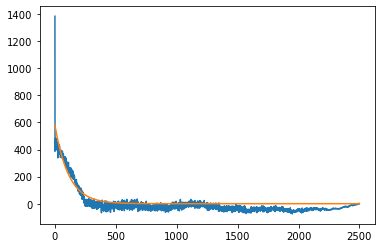

In [27]:
%matplotlib inline
#df4.plot()
a = df5['mag50_0'] - df5['mag50_0'].mean()
corr = np.correlate(a, a, mode='full')
corr = corr[corr.size//2:]
plt.plot(corr)
popt, pcov = curve_fit(exponential, np.arange(corr.size), (corr), p0=[1e12, 1])
plt.plot(exponential(np.arange(corr.size), *popt))
corrt.append(popt[1])

In [28]:
corrt = np.array(corrt)
x = corrt

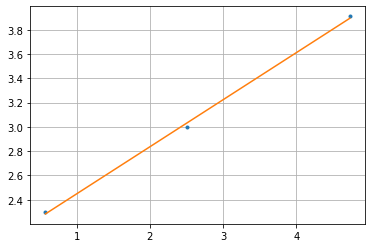

In [30]:
sizes = np.array([10, 20, 50])
y = sizes
popt1, pcov1 = curve_fit(linear, np.log(x), np.log(y))
plt.plot(np.log(x), np.log(y), '.')
plt.plot(np.log(x), linear(np.log(x), *popt1))
plt.grid()
#plt.plot(sizes, corrt, '.')
#plt.xscale('log')
#plt.yscale('log')

In [31]:
popt1

array([2.0599011 , 0.38813617])

# Wolff

In [22]:
df4 = pd.read_csv('data/size10_0.csv')

In [23]:
corrt = []

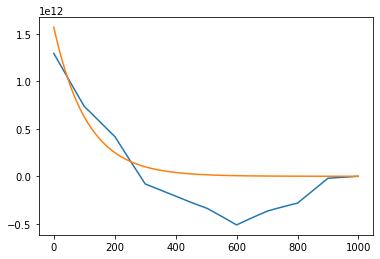

In [24]:
%matplotlib inline
#df4.plot()
a = df4['mag10_0'] - df4['mag10_0'].mean()
corr = np.correlate(a, a, mode='full')
corr = corr[corr.size//2:]
plt.plot(corr)
popt, pcov = curve_fit(exponential, np.arange(corr.size), (corr), p0=[1e12, 1])
plt.plot(exponential(np.arange(corr.size), *popt))
corrt.append(popt[1])

In [25]:
df5 = pd.read_csv('data/size20_0.csv')

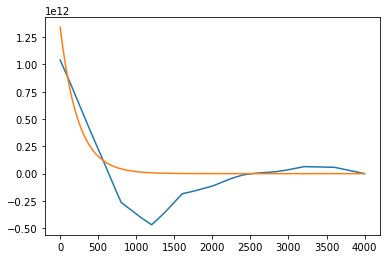

In [26]:
%matplotlib inline
#df4.plot()
a = df5['mag20_0'] - df5['mag20_0'].mean()
corr = np.correlate(a, a, mode='full')
corr = corr[corr.size//2:]
plt.plot(corr)
popt, pcov = curve_fit(exponential, np.arange(corr.size), (corr), p0=[1e12, 1])
plt.plot(exponential(np.arange(corr.size), *popt))
corrt.append(popt[1])

In [27]:
df5 = pd.read_csv('data/size50_0.csv')

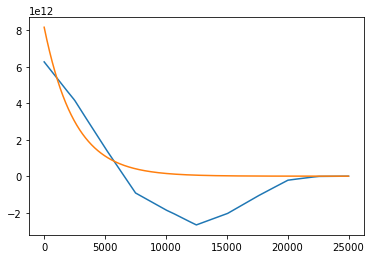

In [28]:
%matplotlib inline
#df4.plot()
a = df5['mag50_0'] - df5['mag50_0'].mean()
corr = np.correlate(a[:50000], a[:50000], mode='full')
corr = corr[corr.size//2:]
plt.plot(corr)
popt, pcov = curve_fit(exponential, np.arange(corr.size), (corr), p0=[6e12, 1])
plt.plot(exponential(np.arange(corr.size), *popt))
corrt.append(popt[1])

In [29]:
corrt = np.array(corrt)
x = corrt

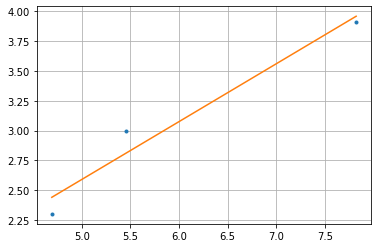

In [30]:
sizes = np.array([10, 20, 50])
y = sizes
popt1, pcov1 = curve_fit(linear, np.log(x), np.log(y))
plt.plot(np.log(x), np.log(y), '.')
plt.plot(np.log(x), linear(np.log(x), *popt1))
plt.grid()
#plt.plot(sizes, corrt, '.')
#plt.xscale('log')
#plt.yscale('log')

In [31]:
popt1

array([0.17387248, 0.48352443])

In [50]:
df

t  mag10_0  t.1       mag20_0       t.2  mag50_0  t.3   mag80_0
0      0.0     0.02  0.0 -4.150000e-01  0.000000  -0.0832  0.0  0.144687
1      1.0     0.02  1.0 -4.150000e-01  1.000000  -0.0832  1.0  0.144687
2      2.0     0.02  2.0 -4.150000e-01  2.000000  -0.0832  2.0  0.144687
3      3.0     0.02  3.0 -4.150000e-01  3.000000  -0.0832  3.0  0.144687
4      4.0     0.02  4.0 -4.150000e-01  4.000000  -0.0832  4.0  0.144687
...    ...      ...  ...           ...       ...      ...  ...       ...
63995  NaN      NaN  NaN  2.880640e+07 -0.046875      NaN  NaN       NaN
63996  NaN      NaN  NaN  2.880640e+07 -0.047188      NaN  NaN       NaN
63997  NaN      NaN  NaN  2.880640e+07 -0.047188      NaN  NaN       NaN
63998  NaN      NaN  NaN  2.880640e+07 -0.047188      NaN  NaN       NaN
63999  NaN      NaN  NaN  2.880640e+07 -0.047188      NaN  NaN       NaN

[64000 rows x 8 columns]

<AxesSubplot:>

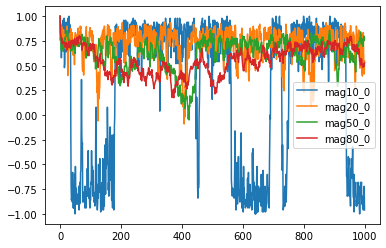

In [50]:
df.plot()

/usr/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


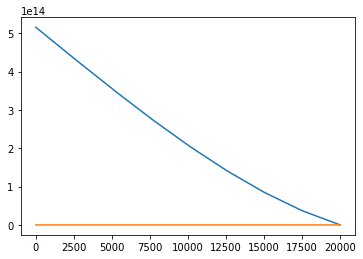

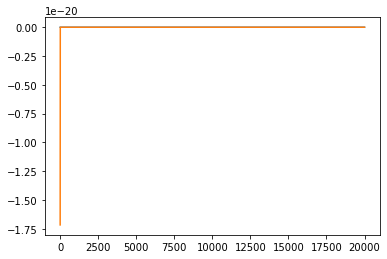

/usr/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


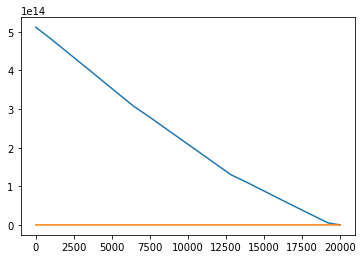

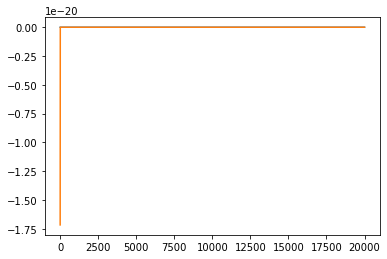

In [48]:
%matplotlib inline
corrt = []
sizes = [10, 20, 50, 80]
for col in list(df.columns):
    a = df[col] - df[col].mean()
    corr = np.correlate(a[:20000], a[:20000], mode='full')
    corr = corr[corr.size//2:]
    #plt.plot(np.arange(corr.size[corr>0]), corr[corr>0], '.')
    plt.figure()
    plt.plot(corr)
    popt, pcov = curve_fit(exponential, np.arange(corr.size), abs(corr))
    plt.plot(exponential(np.arange(corr.size), *popt))
    corrt.append(popt[1])
    plt.show()

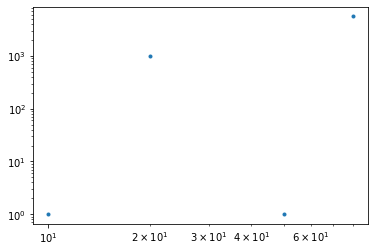

In [43]:
plt.plot(sizes, corrt, '.')
plt.xscale('log')
plt.yscale('log')
x = np.array(sizes)
y = np.array(corrt)

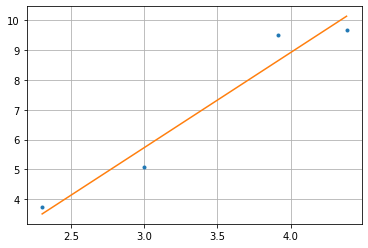

In [34]:
popt1, pcov1 = curve_fit(linear, np.log(x), np.log(y))
plt.plot(np.log(x), np.log(y), '.')
plt.plot(np.log(x), linear(np.log(x), *popt1))
plt.grid()

In [36]:
popt1

array([-3.83820585,  3.18908286])

In [34]:
dfs = pd.read_csv('old/mag.csv', names=['t', '5mag', '8mag', '10mag', '12mag'])

In [35]:
dfs

t  5mag     8mag  10mag     12mag
0           0.000000 -0.20  0.12500   0.02 -0.083333
1           0.694444  0.20  0.00000   0.02  0.083333
2           1.388890  0.12  0.00000   0.02 -0.013889
3           2.083330 -0.04  0.00000  -0.02 -0.013889
4           2.777780  0.04  0.12500   0.02  0.027778
...              ...   ...      ...    ...       ...
99996   69441.700000 -0.04  0.00000  -0.02 -0.055556
99997   69442.400000  0.04  0.03125  -0.06 -0.041667
99998   69443.100000  0.04 -0.06250   0.02 -0.083333
99999   69443.800000 -0.04 -0.03125  -0.02  0.013889
100000           NaN   NaN      NaN    NaN       NaN

[100001 rows x 5 columns]

In [36]:
dfs.dropna(inplace=True)

<ipython-input-10-be921ce7e0b6>:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-x/b)
<ipython-input-10-be921ce7e0b6>:2: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-x/b)


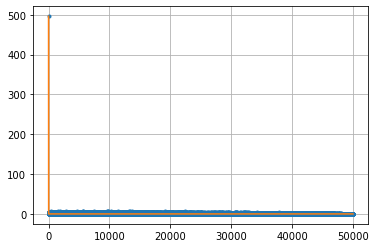

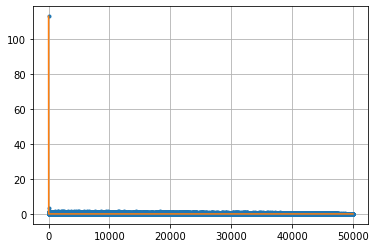

<ipython-input-10-be921ce7e0b6>:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-x/b)
<ipython-input-10-be921ce7e0b6>:2: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-x/b)


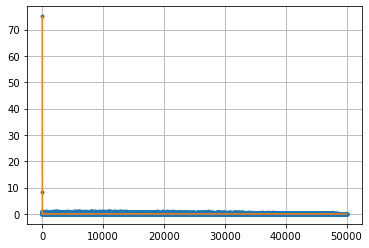

<ipython-input-10-be921ce7e0b6>:2: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-x/b)
<ipython-input-10-be921ce7e0b6>:2: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-x/b)


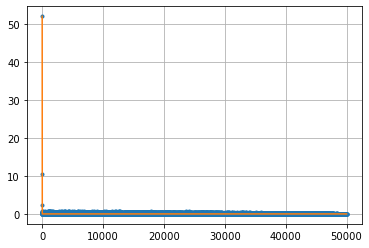

In [37]:
corrt = []
for time, mag in zip (#['t', 't.1', 't.2', 't.3', 't.4', 't.5'],
    ['t', 't', 't', 't'],
                      #['10mag', '20mag', '50mag', '80mag', '100mag', '200mag'],
    ['5mag', '8mag', '10mag', '12mag']
                      #[[700, 0.1], [4e5, 20], [3e6, 40], [0.4e7, 70], [2.5e6, 1], [9e6, 1]]
                     ):
    #plt.figure()
    #dfs.plot(time, mag)
    a = dfs[mag] - dfs[mag].mean()
    corr = np.correlate(a[:50000], a[:50000], mode='full')
    corr = corr[corr.size//2:]
    popt, pcov = curve_fit(exponential, np.arange(corr.size)[corr>0], corr[corr>0])
    plt.figure()
    plt.plot(np.arange(corr.size)[corr>0], corr[corr>0], '.')
    plt.plot(np.arange(corr.size)[corr>0], exponential(np.arange(corr.size)[corr>0], *popt))
    plt.grid()
    plt.show()
    corrt.append(popt[1])

In [9]:
#popt, pcov = curve_fit(linear, np.arange(corr.size)[corr>0], np.log(corr[corr>0]))
#plt.figure()
#plt.plot(df[time][:200], np.log(corr[:200]), '.')
#plt.plot(df[time][:1000], exponential(df[time][:1000], *popt))
#plt.grid()
#plt.show()

In [10]:
corrt

[4.586740280719826,
 7.100867805686548,
 17.733901096011014,
 33.750989012500966,
 48.045348903982564,
 95.40569378615986]

In [11]:
x = np.asarray([10, 20, 50, 80, 100, 200])
y = np.asarray(corrt)

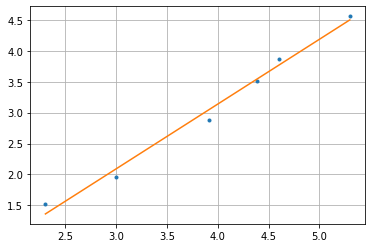

In [12]:
popt1, pcov1 = curve_fit(linear, np.log(x), np.log(y))
plt.plot(np.log(x), np.log(y), '.')
plt.plot(np.log(x), linear(np.log(x), *popt1))
plt.grid()

In [13]:
popt1

array([-1.04831077,  1.04690904])

In [14]:
np.sqrt(np.diag(pcov1))

array([0.24025257, 0.05942825])